# Python实现信号滤波（基于scipy）

scipy.signal.filtfilt()

## 1.背景介绍
 

在深度学习中，有时会使用Matlab进行滤波处理，再将处理过的数据送入神经网络中。这样是一般的处理方法，但是处理起来却有些繁琐，并且有时系统难以运行Matlab。Python作为一种十分强大的语言，是支持信号滤波滤波处理的。

本文将以实战的形式基于scipy模块使用Python实现简单滤波处理，包括内容有1.低通滤波，2.高通滤波，3.带通滤波，4.带阻滤波器。具体的含义大家可以查阅大学课程，信号与系统。简单的理解就是低通滤波指的是去除高于某一阈值频率的信号；高通滤波去除低于某一频率的信号；带通滤波指的是类似低通高通的结合保留中间频率信号；带阻滤波也是低通高通的结合只是过滤掉的是中间部分。上面所说的内容会在实战部分加以介绍，可以对比理解一下。

如何实现的呢？我的理解，是通过时域转换为频域，在频域信号中去除相应频域信号，最后在逆转换还原为时域型号。具体的内容还是要查阅大学课程，信号与系统。自己学的很一般就不班门弄斧了。

有什么作用呢？My Opinions，可以消除一些干扰信号，以低通滤波为例，例如我们如果只是统计脉搏信号波形，应该在1Hz左右，却发现波形信号上有很多噪音，这些噪音都是成百上千Hz的，这些对于脉搏信号波形就属于无用的噪音，我们就可以通过低通滤波器将超出某一阈值的信号过滤掉，此时得到的波形就会比较平滑了。

## 2. 函数介绍 


使用scipy模块，可以通过下述命令进行安装：（我使用的Python==3.6）

pip install scipy


### (1)滤波函数

```scipy.signal.filtfilt(b, a, x, axis=-1, padtype='odd', padlen=None, method='pad', irlen=None)```

输入参数：

b: 滤波器的分子系数向量

a: 滤波器的分母系数向量

x: 要过滤的数据数组。（array型）

axis: 指定要过滤的数据数组x的轴

padtype: 必须是“奇数”、“偶数”、“常数”或“无”。这决定了用于过滤器应用的填充信号的扩展类型。{‘odd’, ‘even’, ‘constant’, None}

padlen：在应用滤波器之前在轴两端延伸X的元素数目。此值必须小于要滤波元素个数- 1。（int型或None）

method：确定处理信号边缘的方法。当method为“pad”时，填充信号；填充类型padtype和padlen决定，irlen被忽略。当method为“gust”时，使用古斯塔夫森方法，而忽略padtype和padlen。{“pad” ，“gust”}

irlen：当method为“gust”时，irlen指定滤波器的脉冲响应的长度。如果irlen是None，则脉冲响应的任何部分都被忽略。对于长信号，指定irlen可以显著改善滤波器的性能。（int型或None）

输出参数：

y:滤波后的数据数组

### （2）滤波器构造函数(仅介绍Butterworth滤波器)

```scipy.signal.butter(N, Wn, btype='low', analog=False, output='ba')```

输入参数：

N:滤波器的阶数

Wn：归一化截止频率。计算公式Wn=2*截止频率/采样频率。
（注意：根据采样定理，采样频率要大于两倍的信号本身最大的频率，才能还原信号。截止频率一定小于信号本身最大的频率，所以Wn一定在0和1之间）。当构造带通滤波器或者带阻滤波器时，Wn为长度为2的列表。

btype : 滤波器类型{‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’},

output : 输出类型{‘ba’, ‘zpk’, ‘sos’},

输出参数：

b，a: IIR滤波器的分子（b）和分母（a）多项式系数向量。output='ba'

z,p,k: IIR滤波器传递函数的零点、极点和系统增益. output= 'zpk'

sos: IIR滤波器的二阶截面表示。output= 'sos'

##  2.实战演练 


1).低通滤波

这里假设采样频率为1000hz,信号本身最大的频率为500hz，要滤除400hz以上频率成分，即截至频率为400hz,则wn=2*400/1000=0.8。Wn=0.8

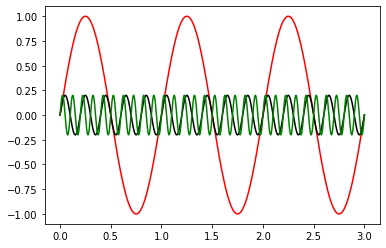

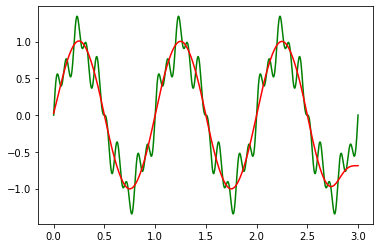

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

f_sampling=1000;  # 采样频率
t=np.linspace(0,3,3*f_sampling,endpoint=True)
#t=np.arange(0,np.pi/2,0.1)
f=1             ##信号基频率
sl=np.sin(2*np.pi*1*f*t)
sm=np.sin(2*np.pi*5*f*t)
sh=np.sin(2*np.pi*10*f*t);
data=1*sl+0.2*sm+0.2*sh
plt.plot(t,sl,'r',t,0.2*sm,'k',t,0.2*sh,'g')
plt.show()   

wn=3*2/f_sampling;
b, a = signal.butter(4, wn, 'lowpass')   #配置滤波器, 8 表示滤波器的阶数
filtedData = signal.filtfilt(b, a, data)  #data为要过滤的信号

plt.plot(t,data,'g',t,filtedData,'r')
plt.show()

2).高通滤波

这里假设采样频率为1000hz,信号本身最大的频率为500hz，要滤除100hz以下频率成分，即截至频率为100hz,则wn=2*100/1000=0.2。Wn=0.2

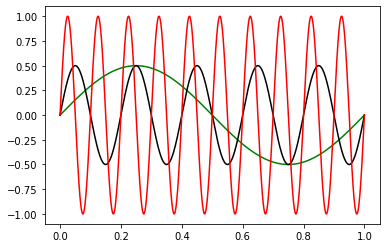

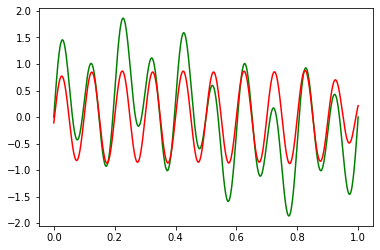

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

f_sampling=1000;  # 采样频率
t=np.linspace(0,1,1*f_sampling,endpoint=True)
#t=np.arange(0,np.pi/2,0.1)
f=1             ##信号基频率
sl=np.sin(2*np.pi*1*f*t)
sm=np.sin(2*np.pi*5*f*t)
sh=np.sin(2*np.pi*10*f*t);
data=0.5*sl+0.5*sm+1*sh
plt.plot(t,0.5*sl,'g',t,0.5*sm,'k',t,sh,'r')

plt.show() 

wn=8*2/f_sampling;
    
b, a = signal.butter(4,wn, 'highpass')   #配置滤波器 8 表示滤波器的阶数
filtedData = signal.filtfilt(b, a, data)  #data为要过滤的信号


plt.plot(t,data,'g',t,filtedData,'r')
plt.show()

3).带通滤波

这里假设采样频率为1000hz,信号本身最大的频率为500hz，要滤除100hz以下，400hz以上频率成分，即截至频率为100，400hz,则wn1=2\*100/1000=0.2，Wn1=0.2； wn2=2\*400/1000=0.8，Wn2=0.8。Wn=[0.02,0.8]

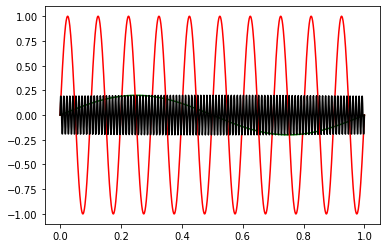

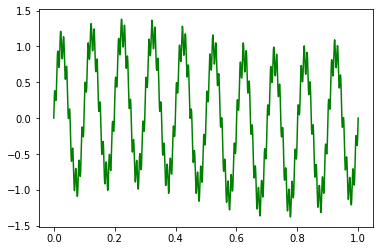

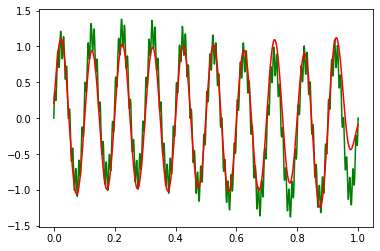

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

f_sampling=1000;  # 采样频率
t=np.linspace(0,1,1*f_sampling,endpoint=True)
#t=np.arange(0,np.pi/2,0.1)
f=1             ##信号基频率
sl=np.sin(2*np.pi*1*f*t)
sm=np.sin(2*np.pi*10*f*t)
sh=np.sin(2*np.pi*100*f*t);
data=0.2*sl+sm+0.2*sh
plt.plot(t,0.2*sl,'g',t,sm,'r',t,0.2*sh,'k')
plt.show() 
plt.plot(t,data,'g')
plt.show()

wn1=4*2/f_sampling;
wn2=20*2/f_sampling;

b,a = signal.butter(4,[wn1,wn2],'bandpass')   #配置滤波器 ,8 表示滤波器的阶数
filtedData = signal.filtfilt(b,a, data)  #data为要过滤的信号


plt.plot(t,data,'g',t,filtedData,'r')
plt.show()

4).带阻滤波

这里假设采样频率为1000hz,信号本身最大的频率为500hz，要滤除100hz以上，400hz以下频率成分，即截至频率为100，400hz,则wn1=2*100/1000=0.2，Wn1=0.2； wn2=2*400/1000=0.8，Wn2=0.8。Wn=[0.02,0.8]，和带通相似，但是带通是保留中间，而带阻是去除。

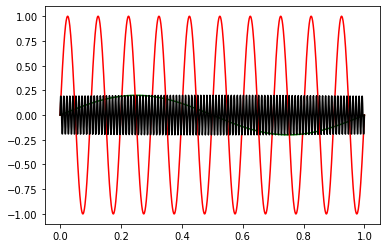

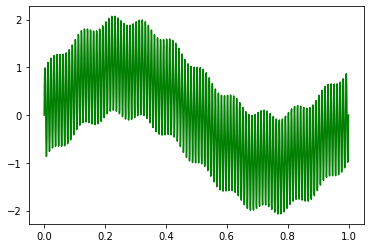

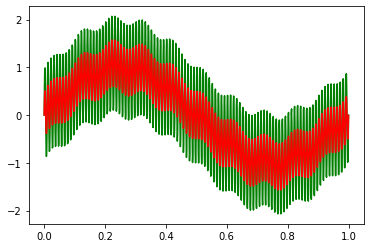

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

f_sampling=1000;  # 采样频率
t=np.linspace(0,1,1*f_sampling,endpoint=True)
#t=np.arange(0,np.pi/2,0.1)
f=1             ##信号基频率
sl=np.sin(2*np.pi*1*f*t)
sm=np.sin(2*np.pi*10*f*t)
sh=np.sin(2*np.pi*100*f*t);
data=sl+0.1*sm+sh
plt.plot(t,0.2*sl,'g',t,sm,'r',t,0.2*sh,'k')
plt.show() 
plt.plot(t,data,'g')
plt.show()

wn1=4*2/f_sampling;
wn2=20*2/f_sampling;

b, a = signal.butter(8, [0.2,0.8], 'bandstop')   #配置滤波器 8 表示滤波器的阶数
filtedData = signal.filtfilt(b, a, data)  #data为要过滤的信号
plt.plot(t,data,'g',t,filtedData,'r')
plt.show()

In [21]:
from scipy import signal
dir(signal)

['BadCoefficients',
 'StateSpace',
 'TransferFunction',
 'ZerosPolesGain',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arraytools',
 '_max_len_seq',
 '_max_len_seq_inner',
 '_peak_finding',
 '_peak_finding_utils',
 '_savitzky_golay',
 '_sosfilt',
 '_spectral',
 '_upfirdn',
 '_upfirdn_apply',
 'abcd_normalize',
 'absolute_import',
 'argrelextrema',
 'argrelmax',
 'argrelmin',
 'band_stop_obj',
 'barthann',
 'bartlett',
 'bessel',
 'besselap',
 'bilinear',
 'bilinear_zpk',
 'blackman',
 'blackmanharris',
 'bode',
 'bohman',
 'boxcar',
 'bspline',
 'bsplines',
 'buttap',
 'butter',
 'buttord',
 'cascade',
 'cheb1ap',
 'cheb1ord',
 'cheb2ap',
 'cheb2ord',
 'chebwin',
 'cheby1',
 'cheby2',
 'check_COLA',
 'check_NOLA',
 'chirp',
 'choose_conv_method',
 'cmplx_sort',
 'coherence',
 'cont2discrete',
 'convolve',
 'convolve2d',
 'correlate',
 'correlate2d',
 'cosine',
 'csd',
 'cspline1d',
 'cspli

## 4.参考


https://blog.csdn.net/weixin_37996604/article/details/82864680 

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.filtfilt.html

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.butter.html#scipy.signal.butter